In [1]:
import random
import numpy as np
%pylab inline


datos=[]
x=0
delta=1
for k in range(1000000):
    x_n=x+random.uniform(-delta,delta)
    if random.uniform(0,1)< np.exp(-x_n**2)/np.exp(-x**2):
        x=x_n
        datos.append(x)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


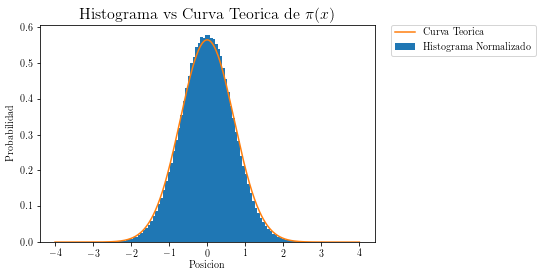

In [2]:
n_bins = 100

x_wf=np.linspace(-4,4,500)
y=(1/np.pi**0.5)*np.exp(-x_wf**2)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

histograma=plt.hist(datos, bins=n_bins,normed=True,label="Histograma Normalizado")
wf=plt.plot(x_wf,y,label="Curva Teorica")

plt.xlabel("Posicion")
plt.ylabel("Probabilidad")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title(r""
          r"Histograma vs Curva Teorica de $\pi(x)$",
          fontsize=16)

# We can set the number of bins with the `bins` kwarg
plt.show()


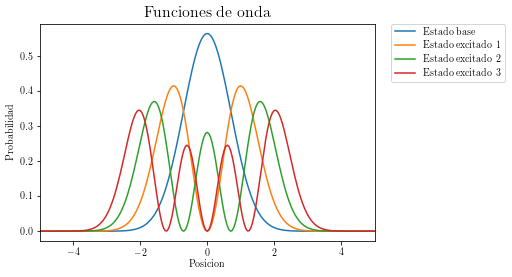

In [80]:
# RUTINA PARA CALCULAR Y GRAFICAR LAS FUNCIONES DE ONDA

n_states=15
grid_x=[i*0.05 for i in range(-1000,1000)]
grid_xround=[round(j,4) for j in grid_x]
psi={}
for x in grid_xround:
    psi[x]=[np.exp(-x**2/2.0)/np.pi**0.25]
    psi[x].append(np.sqrt(2)*x*psi[x][0])
    for n in range(2,n_states):
        psi[x].append(np.sqrt(2.0/n)*x*psi[x][n-1]-np.sqrt((n-1.0)/n)*psi[x][n-2])
    
    
psi_0=np.array([psi[x][0] for x in grid_xround])
psi_1=np.array([psi[x][1] for x in grid_xround])
psi_2=np.array([psi[x][2] for x in grid_xround])
psi_3=np.array([psi[x][3] for x in grid_xround])

p0=plt.plot(grid_xround,psi_0*psi_0,label="Estado base")
p1=plt.plot(grid_xround,psi_1*psi_1,label="Estado excitado 1")
p2=plt.plot(grid_xround,psi_2*psi_2,label="Estado excitado 2")
p3=plt.plot(grid_xround,psi_3*psi_3,label="Estado excitado 3")
plt.xlabel("Posicion")
plt.ylabel("Probabilidad")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

xlim(-5,5)

plt.title(r""
          r"Funciones de onda",
          fontsize=16)



In [4]:
# FUNCION PARA GENERAR CAMINATA ALEATORIA
def paso(a,b):
    import random
    x=random.uniform(-1,1)
    if x>0:
        return a*random.randint(1,5)
    else:
        return b*random.randint(1,5)
    

# GENERANDO HISTOGRAMAS A MISMO NIVEL DE ENERGIA

# ESTADO BASE
datos0=[]
x=0.0
delta=0.05
for k in range(200000):
    x_n=round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][0]*psi[x_n][0]/(psi[x][0]*psi[x][0]):
        x=x_n
        datos0.append(x)
        
# PRIMER ESTADO EXCITADO
        
datos1=[]
x=0.05
delta=0.05
for k in range(100000):
    x_n=round(x+paso(-delta,delta),4)
    if x_n==0:
        x_n=x_n+round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][1]*psi[x_n][1]/(psi[x][1]*psi[x][1]):
        x=x_n
        datos1.append(x)
x=-0.05
delta=0.05
for k in range(100000):
    x_n=round(x+paso(-delta,delta),4)
    if x_n==0:
        x_n=x_n+round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][1]*psi[x_n][1]/(psi[x][1]*psi[x][1]):
        x=x_n
        datos1.append(x)


# SEGUNDO ESTADO EXCITADO

datos2=[]
x=0.0
delta=0.05
for k in range(200000):
    x_n=round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][2]*psi[x_n][2]/(psi[x][2]*psi[x][2]):
        x=x_n
        datos2.append(x)
        
        
# TERCER ESTADO EXCITADO

datos3=[]
x=0.05
delta=0.05
for k in range(100000):
    x_n=round(x+paso(-delta,delta),4)
    if x_n==0:
        x_n=x_n+round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][3]*psi[x_n][3]/(psi[x][3]*psi[x][3]):
        x=x_n
        datos3.append(x)
x=-0.05
delta=0.05
for k in range(100000):
    x_n=round(x+paso(-delta,delta),4)
    if x_n==0:
        x_n=x_n+round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][3]*psi[x_n][3]/(psi[x][3]*psi[x][3]):
        x=x_n
        datos3.append(x)


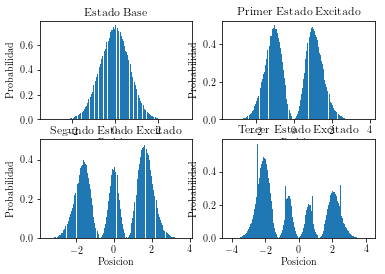

In [5]:
n_bins=160
plt.subplot(221)
plt.hist(datos0, bins=n_bins,normed=True,label="Histograma Normalizado")
plt.xlabel("Posicion")
plt.ylabel("Probabilidad")
plt.title("Estado Base")

plt.subplot(222)
plt.hist(datos1, bins=n_bins,normed=True,label="Histograma Normalizado")
plt.xlabel("Posicion")
plt.ylabel("Probabilidad")
plt.title("Primer Estado Excitado")

plt.subplot(223)
plt.hist(datos2, bins=n_bins,normed=True,label="Histograma Normalizado")
plt.xlabel("Posicion")
plt.ylabel("Probabilidad")
plt.title("Segundo Estado Excitado")

plt.subplot(224)
plt.hist(datos3, bins=n_bins,normed=True,label="Histograma Normalizado")
plt.xlabel("Posicion")
plt.ylabel("Probabilidad")
plt.title("Tercer Estado Excitado")

In [101]:
# MOVIDAS DE n A m

# Temperatura beta=5

n=random.randint(0,14)
beta=5
datosb5=[]
x=0.05
delta=0.05
for k in range(1000000):
    x_n=round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][n]*psi[x_n][n]/(psi[x][n]*psi[x][n]):
        x=x_n
        if random.uniform(0,1)>0.5:
            m=n+1
        else:
            m=n-1
        if m<0 or m>14:
            m=n
        
        if random.uniform(0,1)< (psi[x_n][m]*psi[x_n][m]/(psi[x_n][n]*psi[x_n][n]))*np.exp(-beta*(m-n)):
            n=m
            datosb5.append(x)
      
            

# Temperatura b=1            
            
n=random.randint(0,14)
beta=1
datosb1=[]
x=0.05
delta=0.05
for k in range(1000000):
    x_n=round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][n]*psi[x_n][n]/(psi[x][n]*psi[x][n]):
        x=x_n
        if random.uniform(0,1)>0.5:
            m=n+1
        else:
            m=n-1
        if m<0 or m>14:
            m=n
        
        if random.uniform(0,1)< (psi[x_n][m]*psi[x_n][m]/(psi[x_n][n]*psi[x_n][n]))*np.exp(-beta*(m-n)):
            n=m
            datosb1.append(x)
        
            

# Temperatura b=0.2
            
n=random.randint(0,14)
beta=0.2
datosb0p2=[]
x=0.05
delta=0.05
for k in range(1000000):
    x_n=round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][n]*psi[x_n][n]/(psi[x][n]*psi[x][n]):
        x=x_n
        if random.uniform(0,1)>0.5:
            m=n+1
        else:
            m=n-1
        if m<0 or m>14:
            m=n
        
        if random.uniform(0,1)< (psi[x_n][m]*psi[x_n][m]/(psi[x_n][n]*psi[x_n][n]))*np.exp(-beta*(m-n)):
            n=m
            datosb0p2.append(x)
        
            

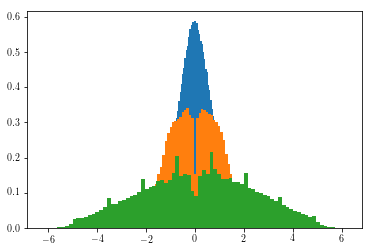

In [107]:
histo_energia=plt.hist(datosb5, bins=120,normed=True,label="Histograma Normalizado")
histo_energia2=plt.hist(datosb1, bins=90,normed=True,label="Histograma Normalizado")
histo_energia3=plt.hist(datosb0p2, bins=80,normed=True,label="Histograma Normalizado")

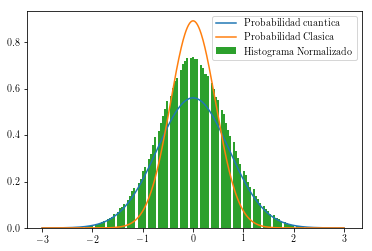

In [108]:
def piquan(beta):
    x=np.linspace(-3,3,500)
    y=np.sqrt(np.tanh(beta/2.0)/np.pi)*np.exp(-x*x*np.tanh(beta/2.0))
    ejes=[x,y]
    return ejes
def piclas(beta):
    x=np.linspace(-3,3,500)
    y=np.sqrt(beta/(2*np.pi))*np.exp(-x*x*beta/2.0)
    ejes=[x,y]
    return ejes
quantum=plt.plot(piquan(5)[0],piquan(5)[1],label="Probabilidad cuantica")
clas=plt.plot(piclas(5)[0],piclas(5)[1],label="Probabilidad Clasica")
histo_energia=plt.hist(datosb5, bins=150,normed=True,label="Histograma Normalizado")
plt.legend()

In [99]:
n=random.randint(0,14)
beta=0.2
datosb0p2=[]
x=0.05
delta=0.05
for k in range(1000000):
    x_n=round(x+paso(-delta,delta),4)
    if random.uniform(0,1)< psi[x_n][n]*psi[x_n][n]/(psi[x][n]*psi[x][n]):
        x=x_n
        if random.uniform(0,1)>0.5:
            m=n+1
        else:
            m=n-1
        if m<0 or m>14:
            m=n
        
        if random.uniform(0,1)< (psi[x_n][m]*psi[x_n][m]/(psi[x_n][n]*psi[x_n][n]))*np.exp(-beta*(m-n)):
            n=m
            datosb0p2.append(x)
print len(datosb0p2)         

489732


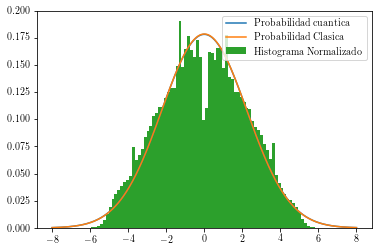

In [100]:
def piquan(beta):
    x=np.linspace(-8,8,800)
    y=np.sqrt(np.tanh(beta/2.0)/np.pi)*np.exp(-x*x*np.tanh(beta/2.0))
    ejes=[x,y]
    return ejes
def piclas(beta):
    x=np.linspace(-8,8,800)
    y=np.sqrt(beta/(2*np.pi))*np.exp(-x*x*beta/2.0)
    ejes=[x,y]
    return ejes
quantum=plt.plot(piquan(0.2)[0],piquan(0.2)[1],label="Probabilidad cuantica")
clas=plt.plot(piclas(0.2)[0],piclas(0.2)[1],label="Probabilidad Clasica")
histo_energia=plt.hist(datosb0p2, bins=80,normed=True,label="Histograma Normalizado")
plt.legend()

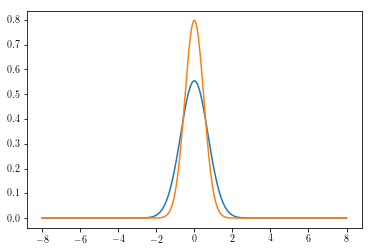

In [98]:
quantum=plt.plot(piquan(4)[0],piquan(4)[1],label="Probabilidad cuantica")
clas=plt.plot(piclas(4)[0],piclas(4)[1],label="Probabilidad Clasica")